<AxesSubplot:>

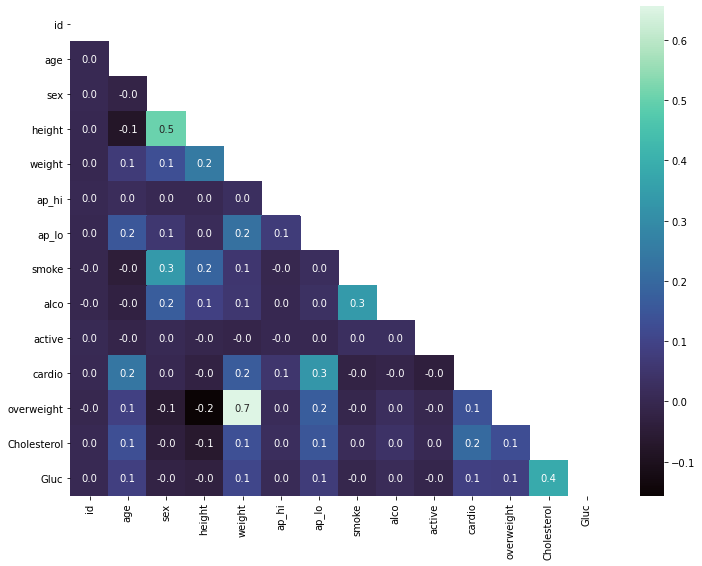

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

df = pd.read_csv("medical_examination.csv")

#Question 1
df['over'] = df.apply(lambda row: row.weight / ((row.height/100)**2), axis=1)
def categorise(row):  
    if row['over'] > 25:
        return 1
    else:
        return 0

df['overweight'] = df.apply(lambda row: categorise(row), axis=1)
df = df.loc[:, df.columns!='over']

#Question 2
def tr(row):
    if row['cholesterol'] > 1:
        return 1
    else:
        return 0

def tr1(row):
    if row['gluc'] > 1:
        return 1
    else:
        return 0

df['Cholesterol'] = df.apply(lambda row: tr(row), axis=1)
df['Gluc'] = df.apply(lambda row: tr1(row), axis=1)
df = df.loc[:, ~df.columns.isin(['cholesterol', 'gluc'])]

#Question 3
df_cat = pd.melt(df, id_vars = "cardio", value_vars=['Cholesterol','Gluc','smoke','alco','active','overweight'])
df_cat2 = df_cat.value_counts().reset_index()
df_cat2.columns = ['cardio', 'variable', 'value', 'sum']
sns.catplot(x="variable", y="sum", hue="value", col="cardio", data=df_cat2, kind="bar", height=6, aspect=.9)

#Question 4
df.drop(df[df['ap_lo'] > df['ap_hi']].index, inplace=True)
df.drop(df[(df['height'] < df['height'].quantile(0.025))].index, inplace=True)
df.drop(df[(df['height'] > df['height'].quantile(0.975))].index, inplace=True)
df.drop(df[(df['weight'] < df['weight'].quantile(0.025))].index, inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975))].index, inplace=True)

#Question 5
corr = df.corr()

matrix = np.triu(corr)

plt.figure(figsize=(12, 9))
palette = sns.color_palette("mako", as_cmap=True)
sns.heatmap(corr, annot=True, mask=matrix, cmap=palette, fmt=".1f")